In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans , AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Loading the csv file into pandas dataframe 
customer_df = pd.read_csv("/Users/dikshant/Downloads/marketing_campaign.csv",sep='\t')

In [3]:
#Displaying first five rows of the dataset
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
#Features Info of the dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Features of the dataset


#### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [5]:
#Shape of the dataset 
print("Dataset size: {0}".format(customer_df.shape))

Dataset size: (2240, 29)


### Data Cleaning

##### Missing values check 

In [6]:
customer_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Insight:**
Income Field has 24 missing values out of 2240. We will fill these missing values with median of the column.

In [7]:
#Imputing the missing values with the median of the column 
customer_df['Income']=customer_df['Income'].fillna(customer_df['Income'].median())

In [8]:
#Checking missing values again to make sure that there is no more NA
customer_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## EDA 

In [9]:
#Checking unique values 
customer_df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

***Insights***  
* Since Z_CostContact and Z_Revenue only have same value for every record it will not help in the model. So we will remove it.

In [10]:
customer_df = customer_df.drop(['Z_CostContact','Z_Revenue'], axis=1)

In [11]:
#Satistical information of the features
customer_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Insights**  

* This dataset contain information about customers who were born between year 1893 and 1996.
* The max number of teenagers and children per household is 2.
* Each campaign has been accepted once with 4 campaign being the most accepted one and campaign 2 being the least.


### Univariate Analysis

In [12]:
#Making a list of categorical columns in the dataset
categorical_columns = customer_df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical Columns:-",categorical_columns)

Categorical Columns:- ['Education', 'Marital_Status', 'Dt_Customer']


In [13]:
#Removing Columns that are not required for visualization 
categorical_columns.remove('Dt_Customer')

In [14]:
#From the above statistical distribution we saw that even though columns like AcceptedCmp* 
#are numerical but they are discrete instead of continous so we will add them in the categorical list
categorical_columns.extend(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                            'AcceptedCmp2', 'Complain','Kidhome','Teenhome'])
categorical_columns

['Education',
 'Marital_Status',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Kidhome',
 'Teenhome']

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


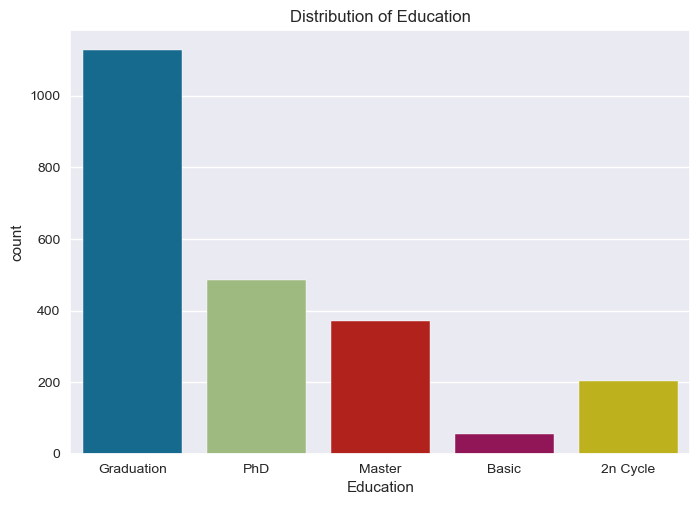

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


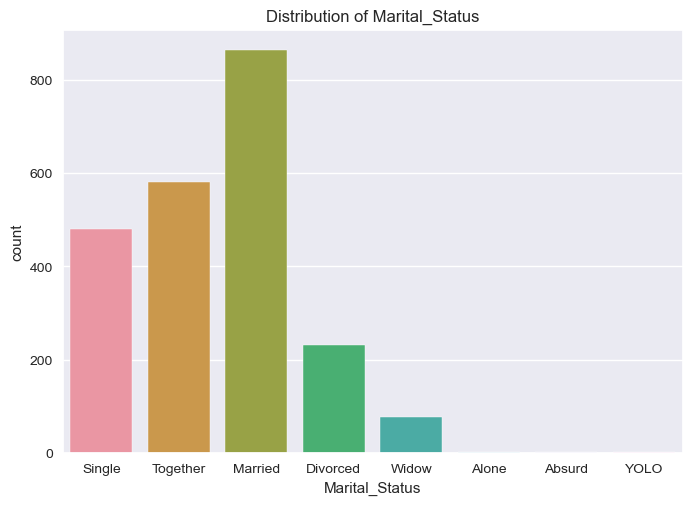

0    2077
1     163
Name: AcceptedCmp3, dtype: int64


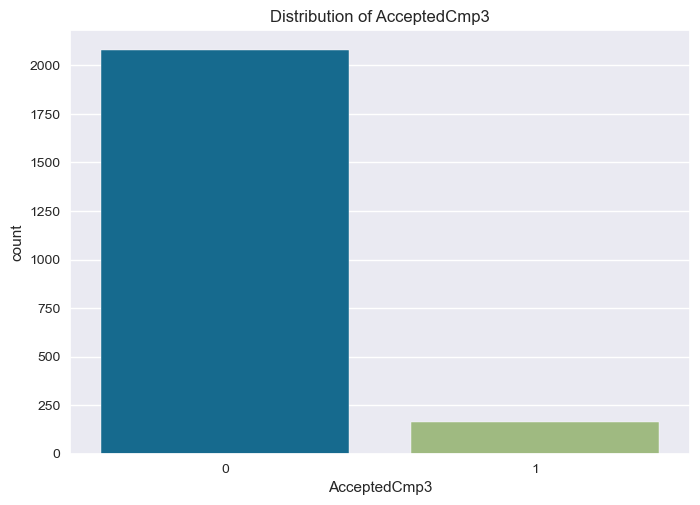

0    2073
1     167
Name: AcceptedCmp4, dtype: int64


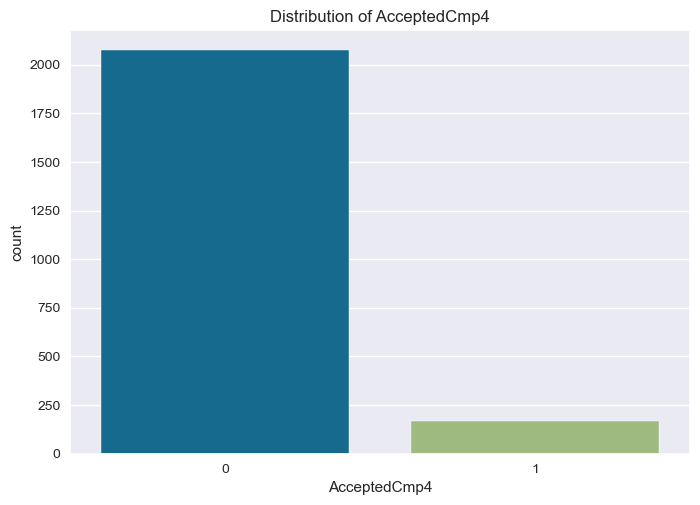

0    2077
1     163
Name: AcceptedCmp5, dtype: int64


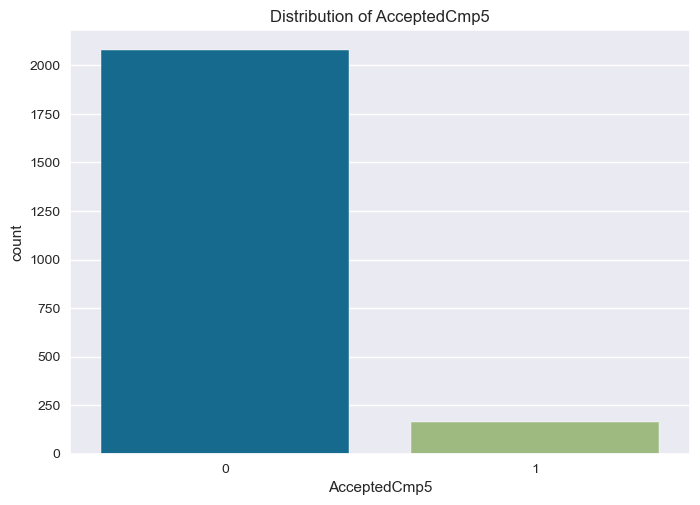

0    2096
1     144
Name: AcceptedCmp1, dtype: int64


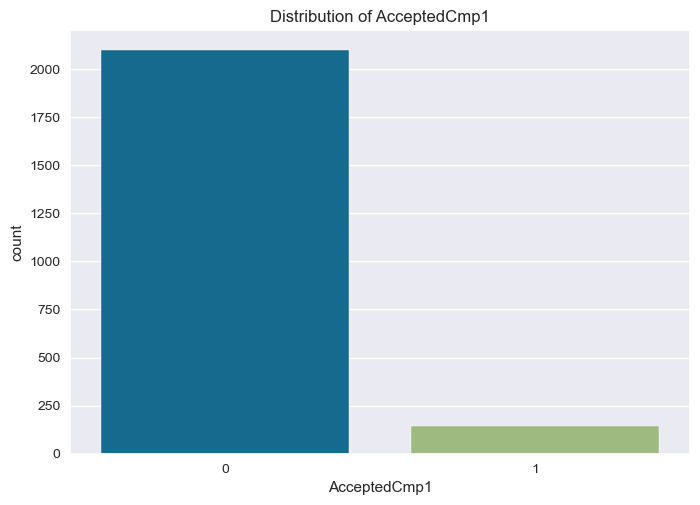

0    2210
1      30
Name: AcceptedCmp2, dtype: int64


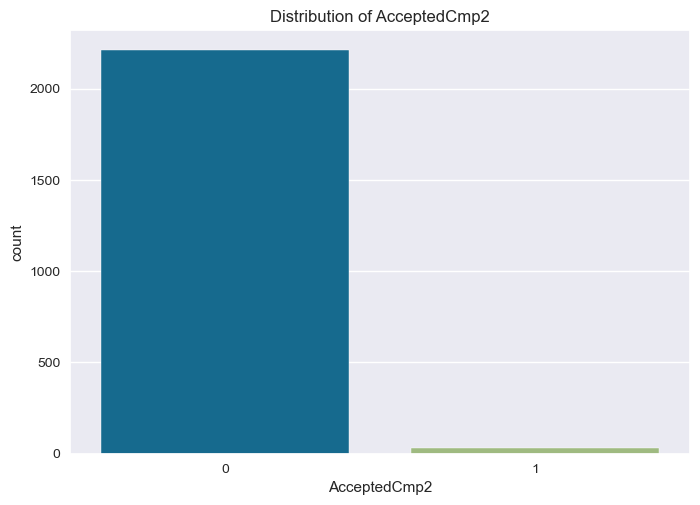

0    2219
1      21
Name: Complain, dtype: int64


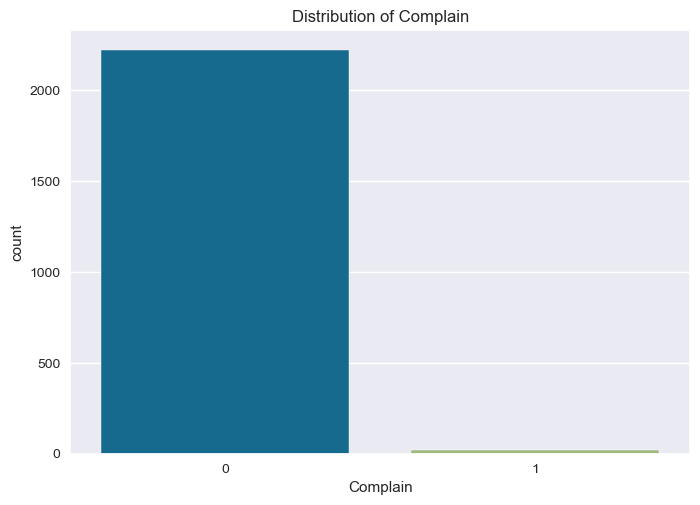

0    1293
1     899
2      48
Name: Kidhome, dtype: int64


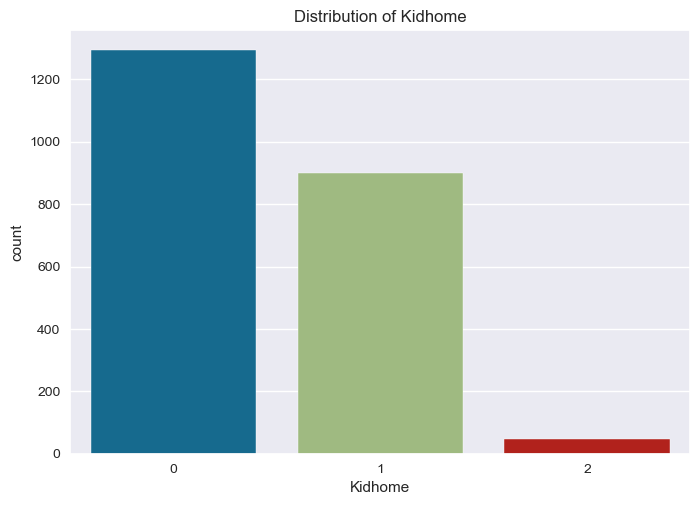

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


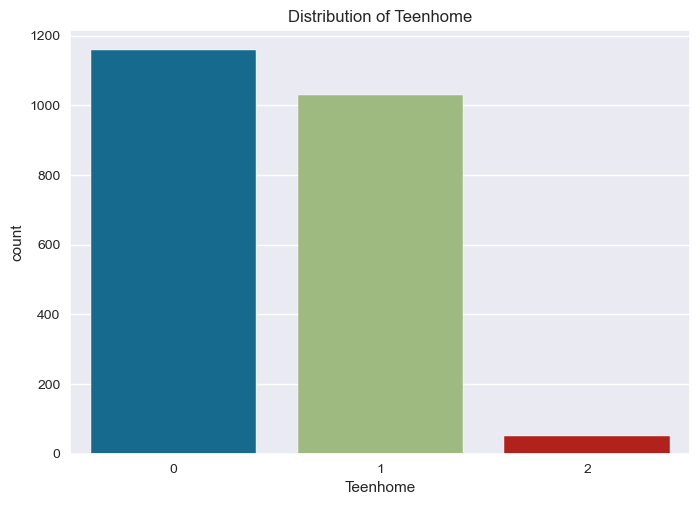

In [15]:
#Making plot of categorical columns
for i in categorical_columns:
    sns.set_style("darkgrid")
    print(customer_df[i].value_counts())
    sns.countplot(x =i, data = customer_df)
    plt.title("Distribution of {0}".format(i))
    plt.show()

**Insights and Recommendations**  
* Most Customers have studied till Graduation Level. Since 2n Cycle and Master are same we will rename them.
* Majority of Customers falls into the category of Marrried and Together. We see various categories for Martial_Status,it would be better if we divided them into two category Together and Alone.
* Majority of Customers have not complained in the last 2 years.
* KidHome and TeenHome for most customers lies between 0 and 1 . We will club these two columns to get total children.
* Majority of Campaigns have not been accepted by Customers, we will add different capmpaigns to find total campaigns.


In [16]:
numerical_columns = customer_df.select_dtypes(include=np.number).columns.to_list()
print("Numerical Columns:-",numerical_columns)

Numerical Columns:- ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


In [17]:
numerical_columns = [i for i in numerical_columns if i not in ('ID','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp1','Complain','AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp2','Year_Birth','Response')]
numerical_columns

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

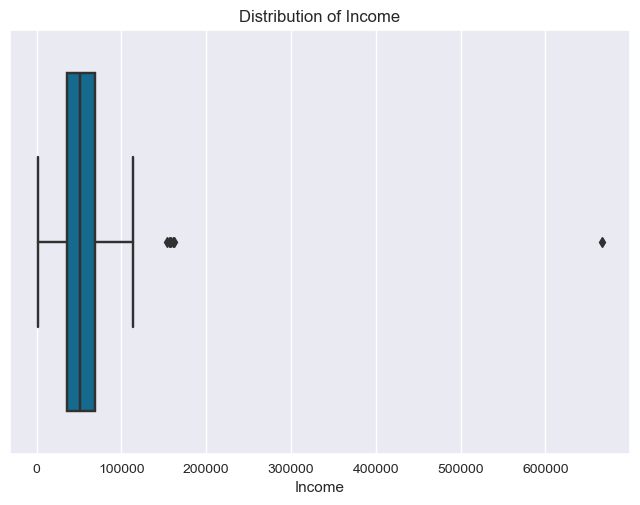

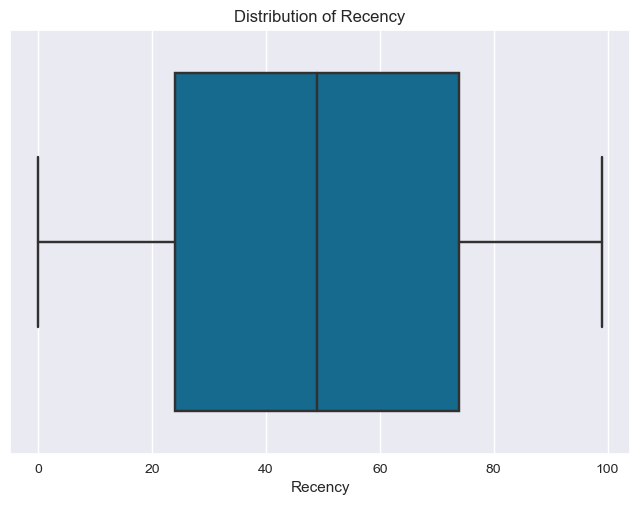

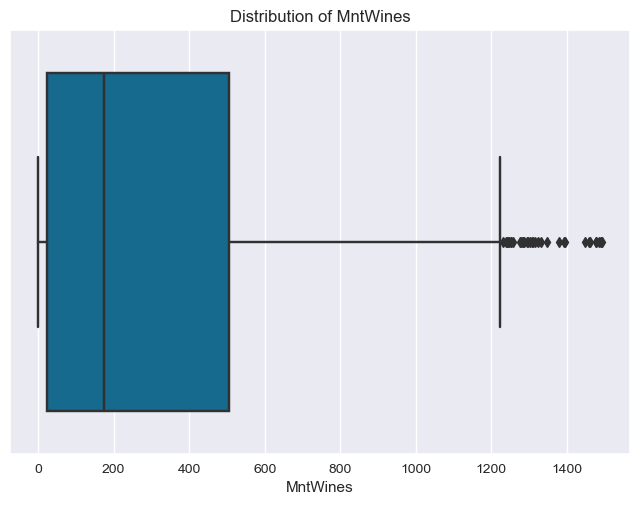

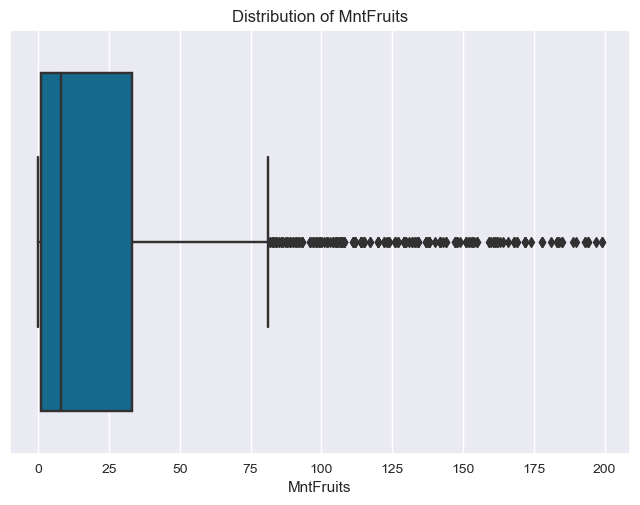

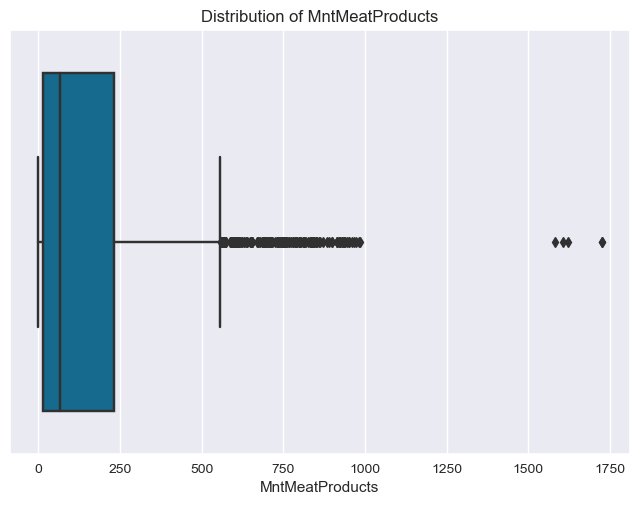

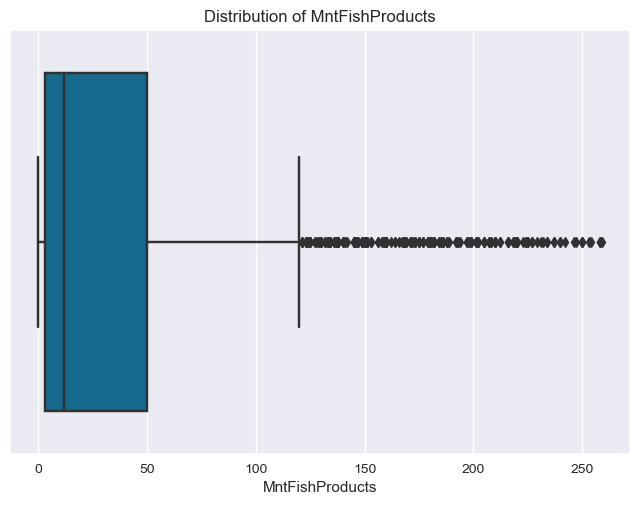

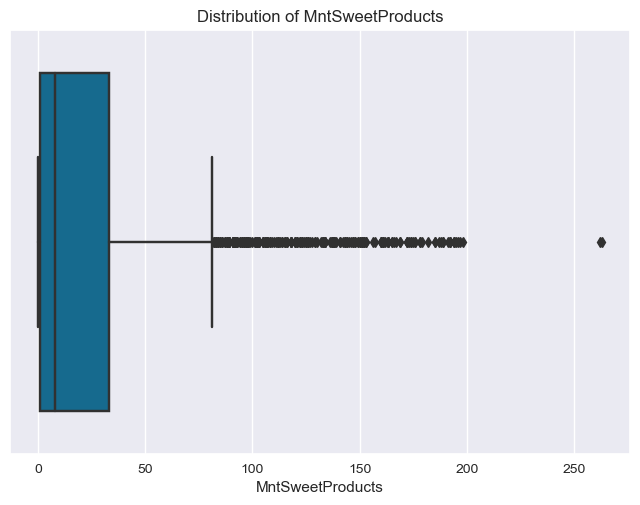

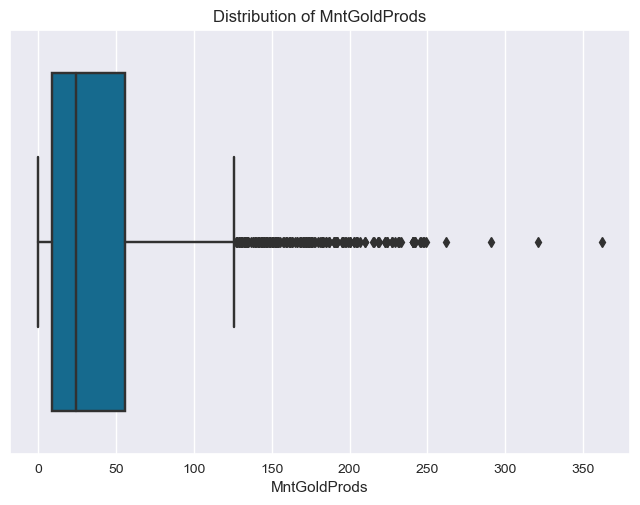

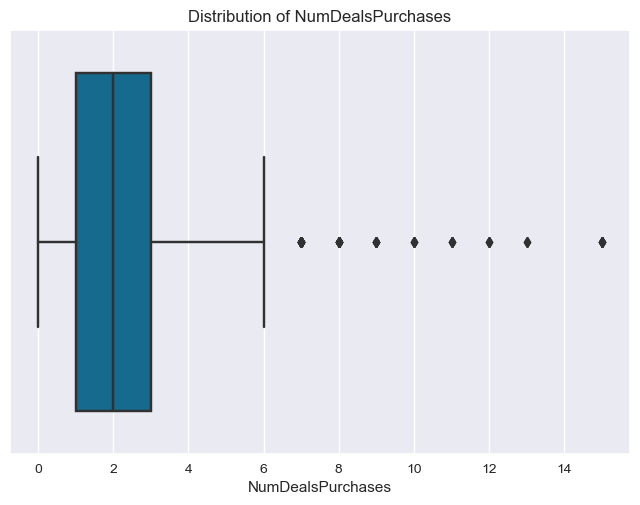

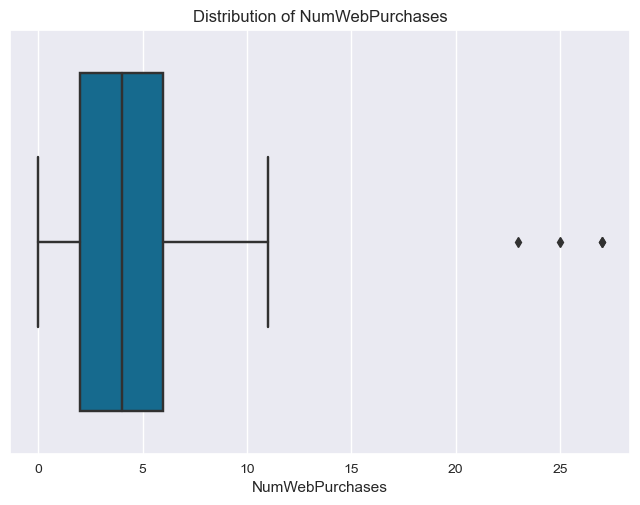

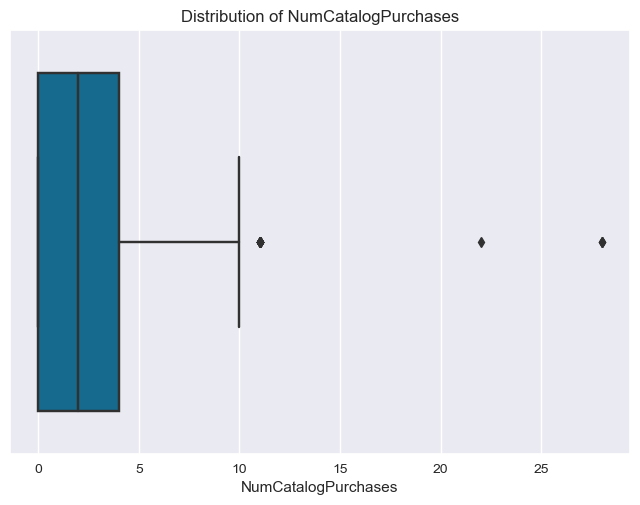

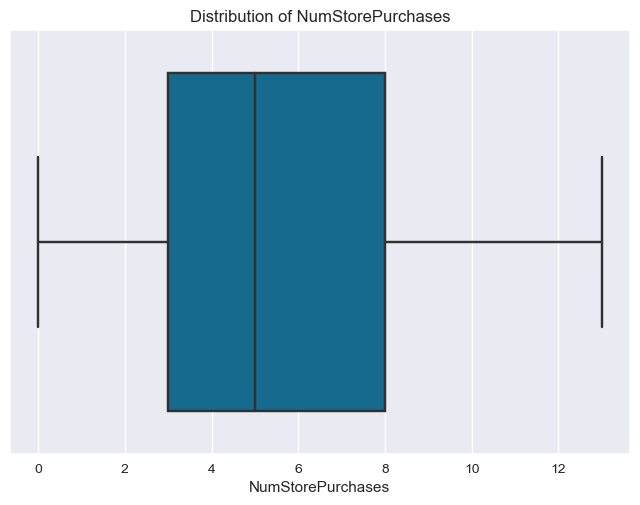

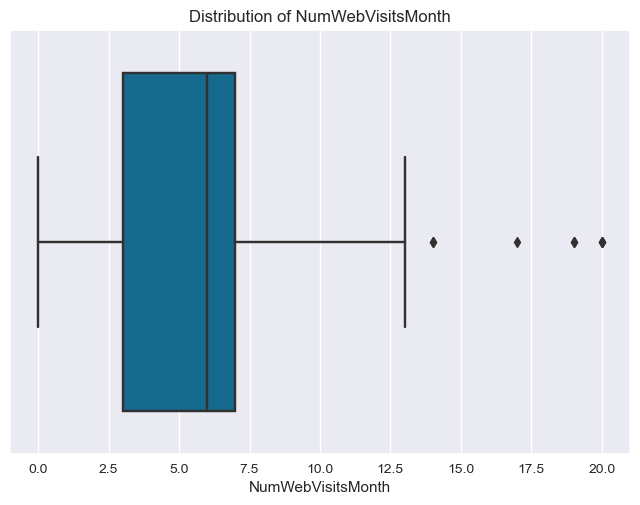

In [18]:
for i in numerical_columns:
    sns.set_style("darkgrid")
    sns.boxplot(x =i, data = customer_df)
    plt.title("Distribution of {0}".format(i))
    plt.show()

### Feature Engineering

In [19]:
#taking 2022 as the current year and checking the age
customer_df['Age'] = 2022 -  customer_df['Year_Birth']

#Adding teenagers and kids to get total children 
customer_df['Total_Children'] = customer_df['Kidhome'] + customer_df['Teenhome']

#Making Date column into date time instead of an str
customer_df['Dt_Customer'] = pd.to_datetime(customer_df["Dt_Customer"], format="%d-%m-%Y")

#Total Spent on Products
customer_df['Total_Spent_Products'] = np.sum(customer_df.filter(regex='Mnt'),axis=1)

#Total Purchasing 
customer_df['Total_Purchased'] = np.sum(customer_df.filter(regex='Purchases'), axis=1)

#Total Accepted campaign
customer_df['TotalAccepted'] = np.sum(customer_df.filter(regex='Accepted'),axis=1)

#Average Web visit per month
customer_df['Avg_Web'] = round(customer_df['NumWebPurchases'] / customer_df['NumWebVisitsMonth'], 2)
customer_df.fillna({'Avg_Web' : 0},inplace=True) # Handling for cases where division by 0
customer_df.replace(np.inf, 0, inplace=True)


#Renaming the columns for better readability
customer_df = customer_df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish",
                            "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Renaming the Martial Status into two categories either Alone or Together
customer_df['Marital_Status'].replace({"Married":"Together","Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"},inplace=True)

#Renaming the Education column
customer_df['Education'].replace({"2n Cycle":"Master"},inplace=True)

#Removing unique identifier ,unused and redudant columns 
customer_df = customer_df.drop(['Kidhome','Teenhome','Year_Birth','ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response','Dt_Customer'], axis=1)


    

In [20]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2240 non-null   object 
 1   Marital_Status        2240 non-null   object 
 2   Income                2240 non-null   float64
 3   Recency               2240 non-null   int64  
 4   Wines                 2240 non-null   int64  
 5   Fruits                2240 non-null   int64  
 6   Meat                  2240 non-null   int64  
 7   Fish                  2240 non-null   int64  
 8   Sweets                2240 non-null   int64  
 9   Gold                  2240 non-null   int64  
 10  NumDealsPurchases     2240 non-null   int64  
 11  NumWebPurchases       2240 non-null   int64  
 12  NumCatalogPurchases   2240 non-null   int64  
 13  NumStorePurchases     2240 non-null   int64  
 14  NumWebVisitsMonth     2240 non-null   int64  
 15  Complain             

In [21]:
customer_df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Children,Total_Spent_Products,Total_Purchased,TotalAccepted,Avg_Web
0,Graduation,Alone,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,65,0,1617,25,0,1.14
1,Graduation,Alone,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,68,2,27,6,0,0.20
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,57,0,776,21,0,2.00
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,38,1,53,8,0,0.33
4,PhD,Together,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,41,1,422,19,0,1.00


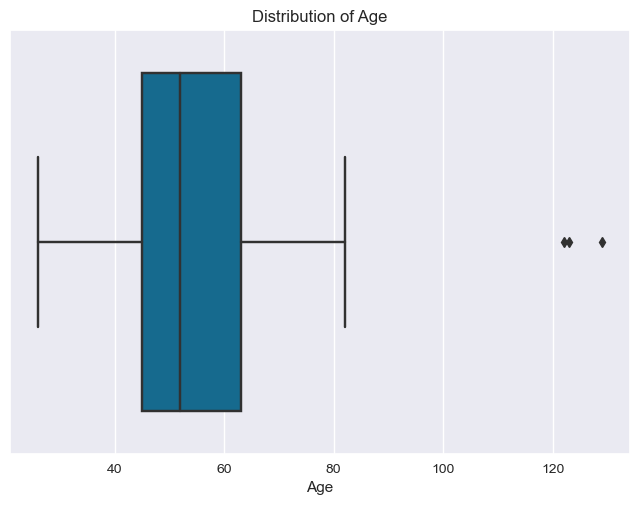

In [22]:
#We will also make visualization of new columns 
sns.set_style("darkgrid")
sns.boxplot(x ='Age', data = customer_df)
plt.title("Distribution of Age")
plt.show()

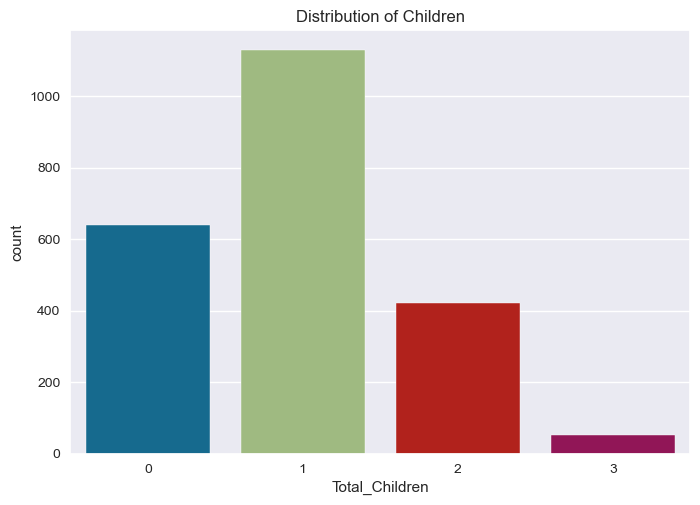

In [23]:
#We will also make visualization of new columns 
sns.set_style("darkgrid")
sns.countplot(x ='Total_Children', data = customer_df)
plt.title("Distribution of Children")
plt.show()

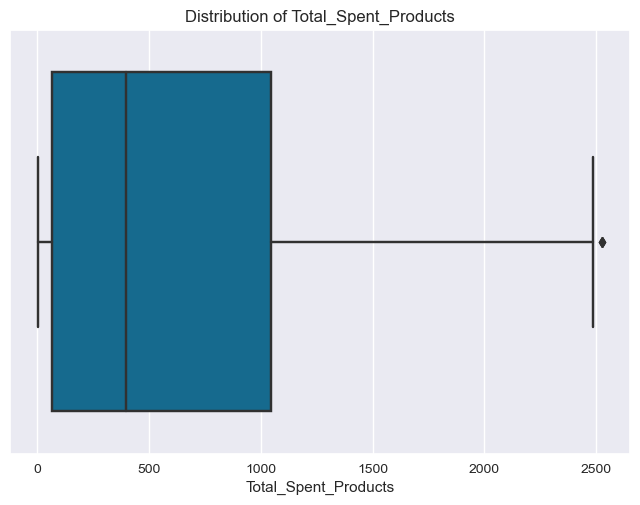

In [24]:
sns.set_style("darkgrid")
sns.boxplot(x ='Total_Spent_Products', data = customer_df)
plt.title("Distribution of Total_Spent_Products")
plt.show()

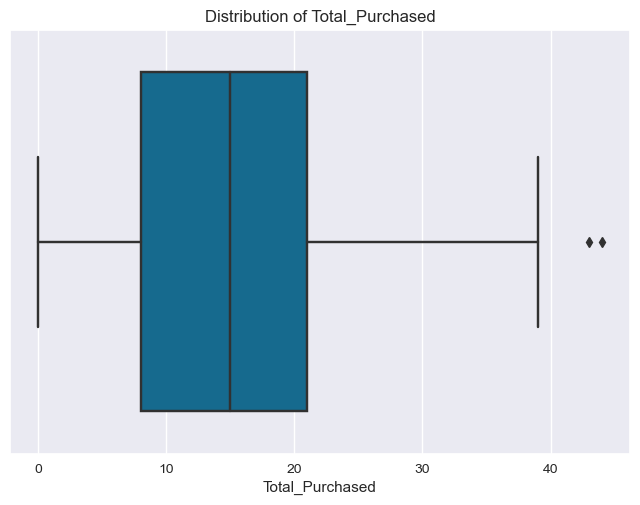

In [25]:
sns.set_style("darkgrid")
sns.boxplot(x ='Total_Purchased', data = customer_df)
plt.title("Distribution of Total_Purchased")
plt.show()

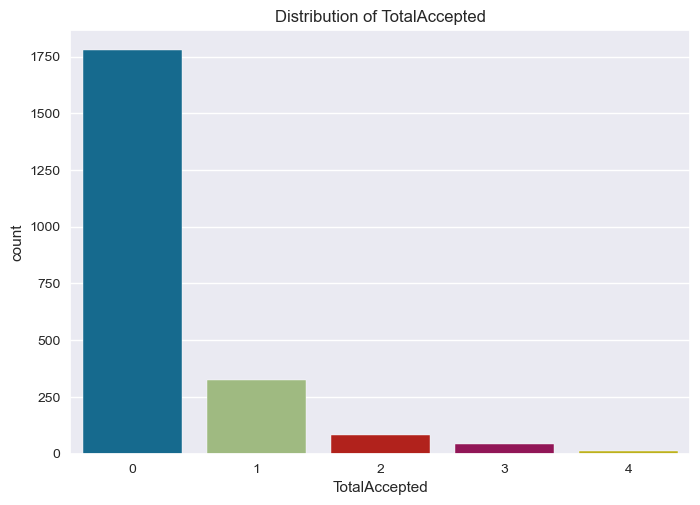

In [26]:
sns.set_style("darkgrid")
sns.countplot(x ='TotalAccepted', data = customer_df)
plt.title("Distribution of TotalAccepted")
plt.show()

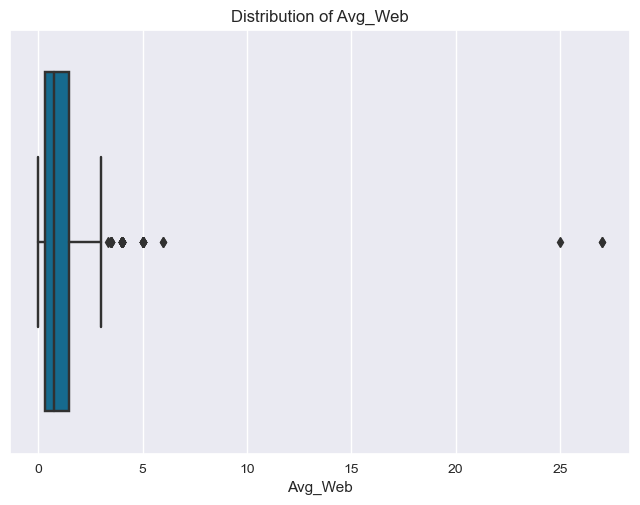

In [27]:
sns.set_style("darkgrid")
sns.boxplot(x ='Avg_Web', data = customer_df)
plt.title("Distribution of Avg_Web")
plt.show()

##### Outlier Treatement

In [28]:
#Dropping the outliers by setting a cap on Age and income. 
customer_df = customer_df[(customer_df["Age"]<90)]
customer_df = customer_df[(customer_df["Income"]<600000)]

<AxesSubplot:>

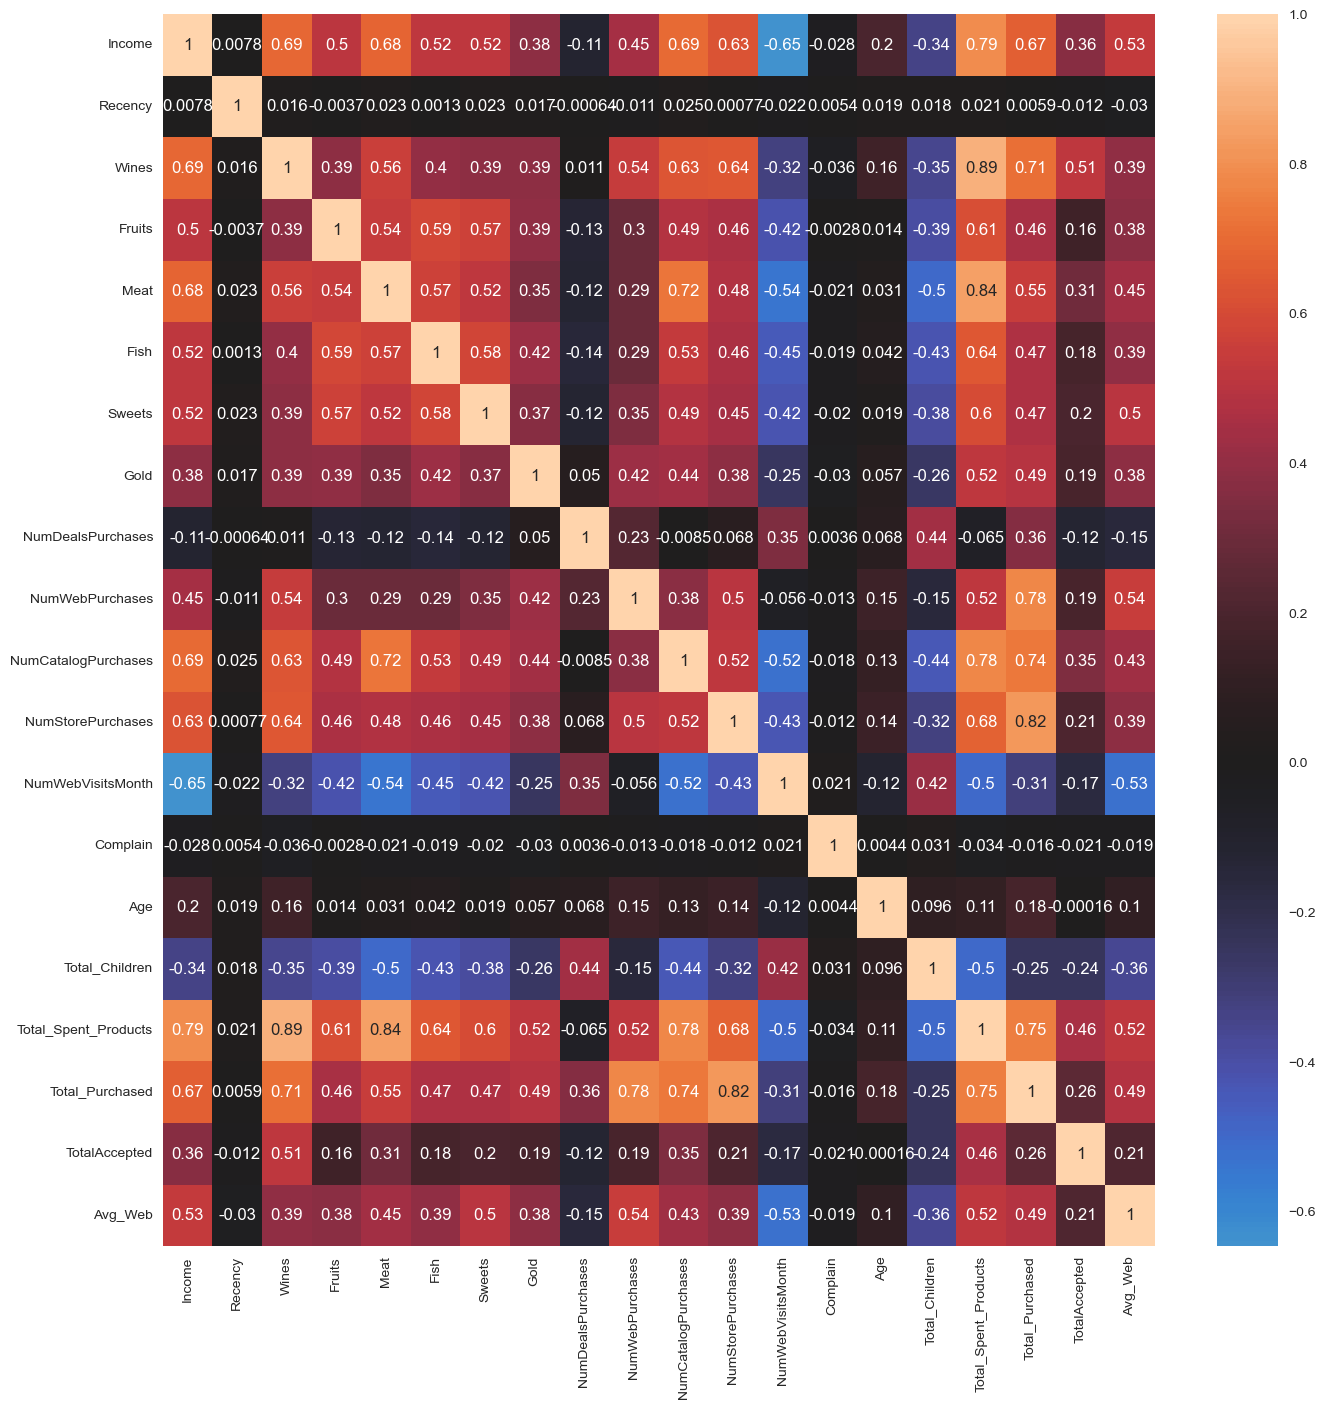

In [29]:
#correlation matrix
corrmat= customer_df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corrmat,annot=True,center=0)

### Data Preprocessing

In [30]:
#Keeping copy of data
customer_df_new = customer_df.copy()
#Label encoding categorical columns
encode = LabelEncoder()
for i in ['Education', 'Marital_Status']:
    customer_df_new[i]=customer_df_new[[i]].apply(encode.fit_transform)

In [31]:

#Scaling the data 
scaled_customer_features = StandardScaler().fit_transform(customer_df_new.values)
customer_df_scaled = pd.DataFrame(scaled_customer_features, index=customer_df_new.index, columns=customer_df_new.columns)
customer_df_scaled.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Children,Total_Spent_Products,Total_Purchased,TotalAccepted,Avg_Web
0,-0.792105,-1.347635,0.288947,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,-0.095001,1.016868,-1.264308,1.680176,1.319340,-0.438933,0.040469
1,-0.792105,-1.347635,-0.262003,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.095001,1.273264,1.395139,-0.962202,-1.155857,-0.438933,-0.667232
2,-0.792105,0.742041,0.918423,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.095001,0.333146,-1.264308,0.282541,0.798246,-0.438933,0.687940
3,-0.792105,0.742041,-1.182183,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.095001,-1.290693,0.065416,-0.918994,-0.895310,-0.438933,-0.569359
4,1.590069,0.742041,0.296187,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.095001,-1.034298,0.065416,-0.305762,0.537699,-0.438933,-0.064934


### Machine Learning

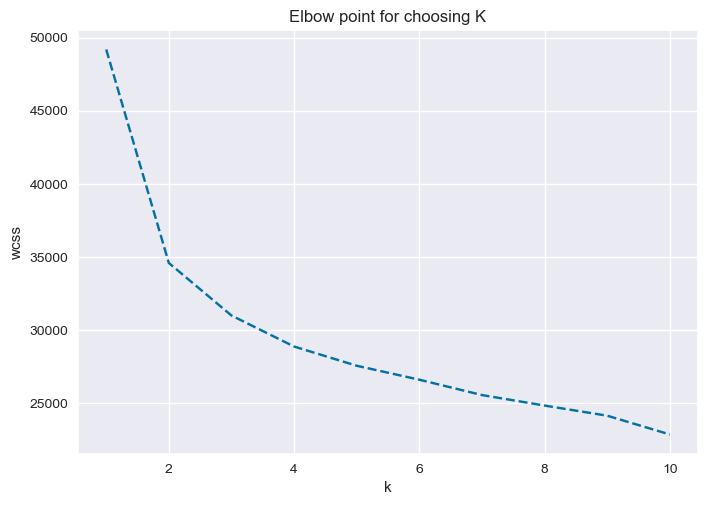

In [32]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(init='k-means++',n_clusters=i,random_state=0)
    kmeans.fit(customer_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,'b--')
plt.xlabel('k')
plt.ylabel('wcss')
plt.title("Elbow point for choosing K")
plt.show()

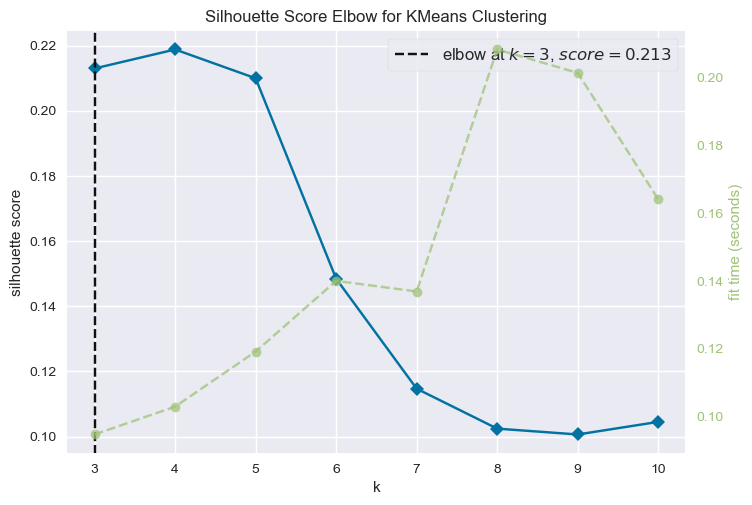

In [33]:
#Using Silhouette Scoring Matrix

model =KMeans(init='k-means++',random_state=0)
visualizer = KElbowVisualizer(model, k=(3,11), metric='silhouette')
visualizer.fit(customer_df_scaled)        # Fit the data to the visualizer
visualizer.finalize()
plt.show()

**Insights**  
* By seeing both the Elbow point plot and Silhouette Score we can determine K to be 3.

In [38]:
final_model = KMeans(init='k-means++',n_clusters=3,random_state=0)
final_model.fit(customer_df_scaled)
pred = final_model.predict(customer_df_scaled)
customer_df['Clusters'] = pred

In [44]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
pred = AC.fit_predict(customer_df_scaled)
customer_df['Clusters_AC'] = pred

In [63]:
#Compare Kmeans and Agglomerative Clustering model 
print("K means Silhouette score:{0}".format(round(silhouette_score(customer_df_scaled, final_model.labels_, metric='euclidean'),2)))
print("AgglomerativeClustering Silhouette score:{0}".format(round(silhouette_score(customer_df_scaled, AC.labels_, metric='euclidean'),2)))

K means Silhouette score:0.21
AgglomerativeClustering Silhouette score:0.19


K means seems to perfom better than AgglomerativeClustering

### Profiling

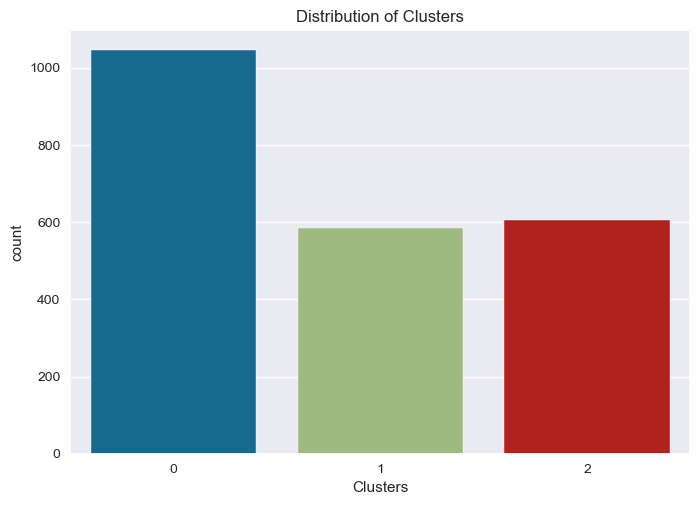

In [39]:
#Visualization of clusters
sns.set_style("darkgrid")
sns.countplot(x ='Clusters', data = customer_df)
plt.title("Distribution of Clusters")
plt.show()

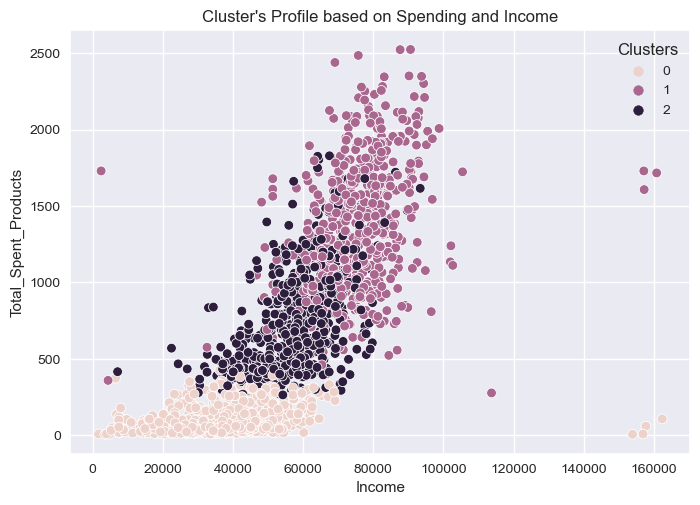

In [40]:
sns.scatterplot(x=customer_df['Income'], y=customer_df["Total_Spent_Products"], hue =customer_df["Clusters"])
plt.title("Cluster's Profile based on Spending and Income")
plt.show()

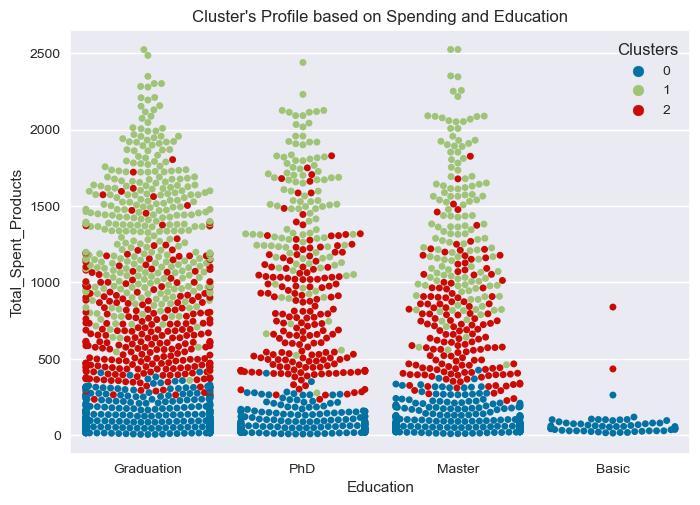

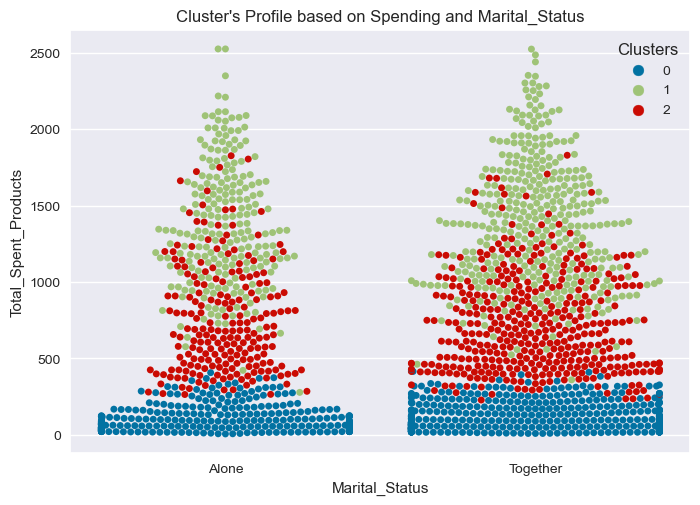

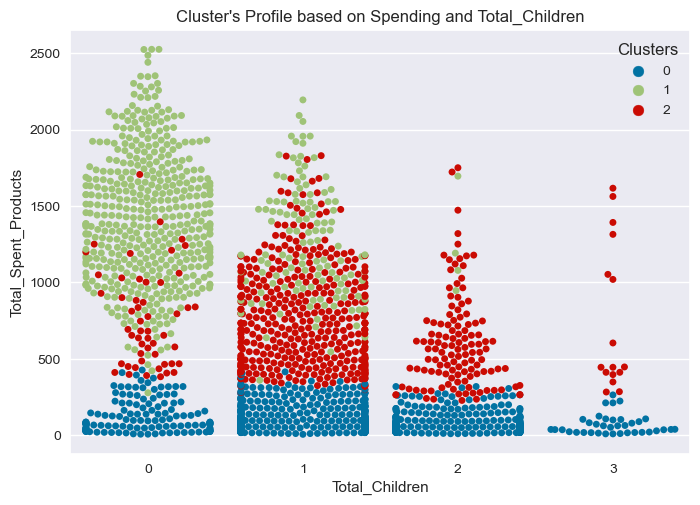

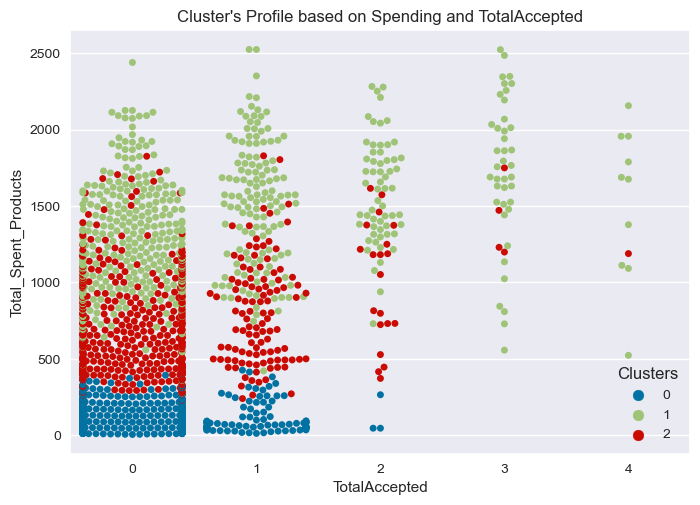

In [41]:
cluster_plot_list = ['Education','Marital_Status','Total_Children','TotalAccepted']
for i in cluster_plot_list:
    plt.figure()
    sns.swarmplot(x=customer_df[i], y=customer_df["Total_Spent_Products"], hue =customer_df["Clusters"])
    plt.title("Cluster's Profile based on Spending and {0}".format(i))
    plt.show()

**Insights**
* Cluster 0 has lowest income and spending while cluster 1 has the highest income and spending.
* Cluster 1 doesnt have people who have only basic education level.
* People in Cluster 1 have more people who have 0 children than rest of the clusters and also doesn't have anyone who has more than 2 children.
* Except few outliers People in Cluster 1 are the only one who accept more number than 3 number of campaigns.